## Тестовое задание к проекту "Large Scale Analysis of Code Quality"
Овчаренко Анатолий, CSC

В настоящем решении я провожу базовый статистический анализ качества кода успешных решений некоторых степов на курсе по Python трека `Python for Beginners` на [Hyperskill](https://hyperskill.org/tracks/6). Сами степы:
1. [6818](https://hyperskill.org/learn/step/6818): `A mean of n.` -- задача на использование цикла `for`
2. [8443](https://hyperskill.org/learn/step/8443): `Coordinates` -- задача на использование условных конструкций (`elif` в частности)
3. [9480](https://hyperskill.org/learn/step/9480): `Tennis tournament` -- задача на использование вложенных списочных выражений
4. [7323](https://hyperskill.org/learn/step/7323): `The sum of numbers in a range` -- задача на реализацию простого алгоритма на Python

<u>Замечание</u>: по техническим причинам описание качества кода я извлекал без использования `Hyperstyle`, благо API `Hyperskill` выдавал помимо решений подробные отзывы на эти решения.

### Используемые библиотеки и настройки по умолчанию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from json import load

matplotlib.rc("figure", dpi=300)
matplotlib.rc("figure", figsize=(12, 6))
matplotlib.rc("font", size=12)
%matplotlib inline

### Константы

In [2]:
SUBMISSIONS_CSV_PATH = "./data/submissions.csv"
FEEDBACKS_JSON_PATH = "./data/submissions_feedbacks.json"
STEPS_CSV_PATH = "./data/steps.csv"

### Загрузка полученных с помощью скрипта `scrape_data.py` данных в таблицы

In [3]:
submissions = pd.read_csv(SUBMISSIONS_CSV_PATH, dtype={"id": str, "step": str})
submissions.head()

,id,step,status,time,lang,code
0,70271849,8443,correct,2022-02-17 15:00:25.779280,python3,"x, y = (float(input()), float(input()))\nif x ..."
1,70268518,6818,correct,2022-02-17 14:27:03.955508,python3,n = int(input())\n\ns = 0\nfor _ in range(n):\...
2,70253022,9480,correct,2022-02-17 11:24:34.880611,python3,n = int(input())\nwinners = []\n\nfor _ in ran...
3,70159178,9480,correct,2022-02-16 13:14:47.935841,python3,# num_lines = int(input())\n# winners = []\n\n...
4,70158116,7323,correct,2022-02-16 13:04:51.340633,python3,"def range_sum(numbers, start, end):\n s = 0..."


In [4]:
submissions.shape

(2273, 6)

Ниже указаны полезные характеристики исследуемых степов: время в секундах для решения, количество решивших и процент успешности.

In [5]:
steps = pd.read_csv(STEPS_CSV_PATH, dtype={"id": str})
steps.head()

,id,seconds_to_complete,solved_by,success_rate
0,8443,549.539000,6803,0.251
1,6818,356.528950,6728,0.411
2,9480,605.464000,4112,0.410
3,7323,453.985405,3135,0.547


In [6]:
with open(FEEDBACKS_JSON_PATH, "r") as feedbacks_file:
    feedbacks = load(feedbacks_file)

feedbacks

{'70271849': {'message': '',
  'code_style': {'quality': {'code': 'EXCELLENT',
    'text': 'Code quality (beta): EXCELLENT'},
   'errors': []}},
 '70268518': {'message': '',
  'code_style': {'quality': {'code': 'EXCELLENT',
    'text': 'Code quality (beta): EXCELLENT'},
   'errors': [{'code': 'WPS519',
     'text': 'Found implicit `sum()` call',
     'line': 'for _ in range(n):',
     'line_number': 3,
     'column_number': 0,
     'category': 'BEST_PRACTICES',
     'difficulty': 'MEDIUM',
     'influence_on_penalty': 0}]}},
 '70253022': {'message': '',
  'code_style': {'quality': {'code': 'EXCELLENT',
    'text': 'Code quality (beta): EXCELLENT'},
   'errors': []}},
 '70159178': {'message': '',
  'code_style': {'quality': {'code': 'EXCELLENT',
    'text': 'Code quality (beta): EXCELLENT'},
   'errors': [{'code': 'WPS237',
     'text': 'Found a too complex `f` string',
     'line': 'f"""{winners}',
     'line_number': 19,
     'column_number': 4,
     'category': 'COMPLEXITY',
     'di

### Анализ распределения вердиктов по степам
Рассмотрим количество вердиктов для каждого из степов в выгруженных данных, их выявлено 4 вида: `BAD`, `MODERATE`, `GOOD`, `EXCELLENT`.

In [7]:
ids_with_feedbacks = [subm_id for subm_id in submissions["id"] if isinstance(feedbacks[subm_id], dict)]

code_qualities = pd.DataFrame({
    "id": ids_with_feedbacks,
    "verdict": [
        feedbacks[subm_id]["code_style"]["quality"]["code"] for subm_id in ids_with_feedbacks
    ]
}).dropna()

print(f"Number of solutions with verdicts: {code_qualities.shape[0]}")
code_qualities.head(15)

Number of solutions with verdicts: 2271


,id,verdict
0,70271849,EXCELLENT
1,70268518,EXCELLENT
2,70253022,EXCELLENT
3,70159178,EXCELLENT
4,70158116,EXCELLENT
5,70106991,EXCELLENT
6,70104098,EXCELLENT
7,70046002,EXCELLENT
8,70045932,EXCELLENT
9,70031307,EXCELLENT


In [8]:
subm_counts = code_qualities.merge(submissions, left_on="id", right_on="id").groupby(by=["step"]).size()
# subm_counts = pd.DataFrame(subm_counts
subm_counts

step
6818    843
7323    372
8443    311
9480    745
dtype: int64

<Figure size 864x360 with 0 Axes>

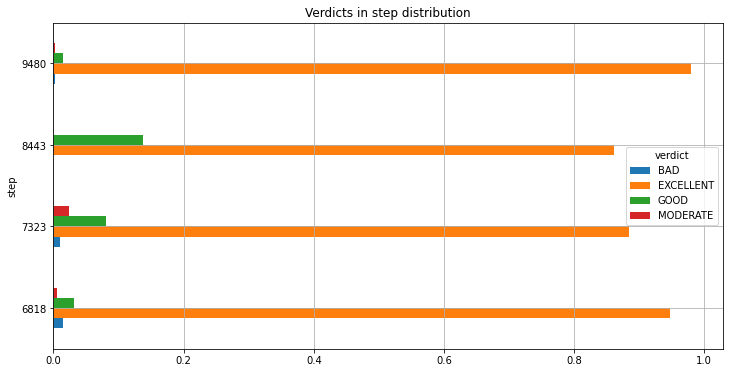

In [9]:
plt.figure(figsize=(12, 5))
code_qualities.merge(submissions, left_on="id", right_on="id") \
              .groupby(by=["step"])["verdict"] \
              .value_counts().unstack(0) \
              .div(subm_counts, axis=1).transpose() \
              .plot.barh(figsize=(12, 6))
plt.grid()
plt.title("Verdicts in step distribution")
plt.show()

Из полученной картинки можно сделать несложные заключения:
1. `success_rate` степа действительно связан с распределением типов качества решений: степ `8443` имеет самый низкий `success_rate` и у него самая малая доля `EXCELLENT`-решений среди всех степов и самая большая доля `GOOD`-решений.
2. Задача на написание простого алгоритма (степ `7323`) имеет самое "разношерстное" распределение типов вердиктов -- так как в задаче явно не указано, как следует ее решать, люди высылают существенно различающиеся варианты кода, что приводит к разнообразным результатам (кто-то написал хорошо, а кто-то не очень) 

### Анализ числа ошибок по степам
Возьмем общее число ошибок среди всех решений каждого степа и поделим это число на общее количество решений данного степа. Ясно, что так как в одном решении может быть довольно много ошибок, то получившийся показатель вполне может превысить 1.

In [10]:
code_errors = pd.DataFrame({
    "id": [subm_id for subm_id in ids_with_feedbacks
           for _ in feedbacks[subm_id]["code_style"]["errors"]],
    "error_code": [error["code"] for subm_id in ids_with_feedbacks 
                   for error in feedbacks[subm_id]["code_style"]["errors"]],
    "error_category": [error["category"] for subm_id in ids_with_feedbacks 
                       for error in feedbacks[subm_id]["code_style"]["errors"]],
    "error_difficulty": [error["difficulty"] for subm_id in ids_with_feedbacks
                         for error in feedbacks[subm_id]["code_style"]["errors"]],
    "text": [error["text"] for subm_id in ids_with_feedbacks
             for error in feedbacks[subm_id]["code_style"]["errors"]],
}).merge(submissions, left_on="id", right_on="id")
errors_counts = code_errors["step"].value_counts().rename_axis("step").reset_index(name="err_counts")
code_errors.head()

,id,error_code,error_category,error_difficulty,text,step,status,time,lang,code
0,70268518,WPS519,BEST_PRACTICES,MEDIUM,Found implicit `sum()` call,6818,correct,2022-02-17 14:27:03.955508,python3,n = int(input())\n\ns = 0\nfor _ in range(n):\...
1,70159178,WPS237,COMPLEXITY,HARD,Found a too complex `f` string,9480,correct,2022-02-16 13:14:47.935841,python3,# num_lines = int(input())\n# winners = []\n\n...
2,70045932,R1716,BEST_PRACTICES,MEDIUM,Simplify chained comparison between the operands,8443,correct,2022-02-15 10:53:42.921044,python3,x = float(input())\ny = float(input())\n\nif x...
3,70027232,WPS223,COMPLEXITY,HARD,Found too many `elif` branches: 6 > 3,8443,correct,2022-02-15 06:02:39.997619,python3,x = float(input())\ny = float(input())\nif x =...
4,70027232,E225,CODE_STYLE,EASY,missing whitespace around operator,8443,correct,2022-02-15 06:02:39.997619,python3,x = float(input())\ny = float(input())\nif x =...


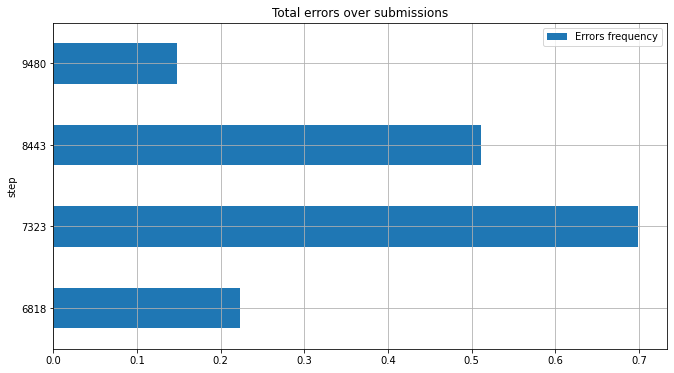

In [11]:
with_subm_counts = submissions.merge(errors_counts, left_on="step", right_on="step") \
                              .groupby(by=["step", "err_counts"]).size() \
                              .reset_index(name="subm_counts")
with_subm_counts["err_freq"] = with_subm_counts["err_counts"] / with_subm_counts["subm_counts"]
with_subm_counts.plot.barh(x="step", y="err_freq", label="Errors frequency", figsize=(11, 6))
plt.title("Total errors over submissions")
plt.grid()
plt.show()

Видим, исходя из полученных показателей:
1. Так как все рассматриваемые задачи простые, то ошибок мало -- в среднем на одно решение даже меньше 1 ошибки в каждом степе
2. Задачи на написание алгоритма набрала больше ошибок: как было уже сказано, отсутствие прямых указаний к написанию кода приводит к тому, что люди пишут сильно по-разному -- это приводит к большим шансам допустить ошибки
3. Среди остальных степов самый большой показатель имеет как раз тот, у которого маленький `success_rate` (`8443`)

### Анализ числа ошибок по категориям
Посмотрим частоту ошибок в каждой из 5 категорий (`BEST_PRACTICES`, `CODE_STYLE`, `COMPLEXITY`, `ERROR_PRONE`, `INFO`) для каждого степа в отдельности.

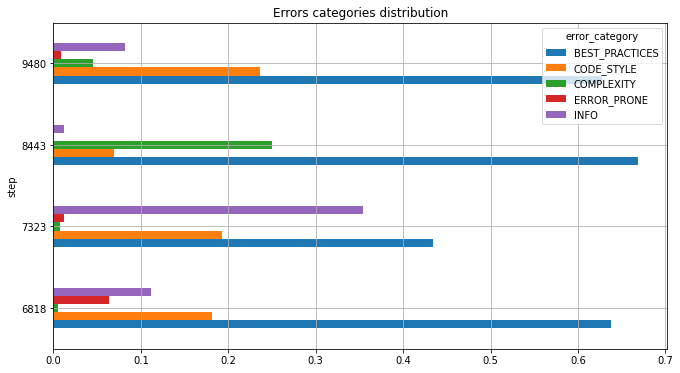

In [12]:
err_counts = pd.Series(with_subm_counts["err_counts"])
err_counts.index = with_subm_counts["step"]

code_errors.groupby(by=["step"])["error_category"] \
           .value_counts().unstack(0).div(err_counts, axis=1) \
           .transpose().plot.barh(figsize=(11, 6))
plt.grid()
plt.title("Errors categories distribution")
plt.show()

In [13]:
code_errors[(code_errors["error_category"] == "ERROR_PRONE")]

,id,error_code,error_category,error_difficulty,text,step,status,time,lang,code
411,27183830,W0622,ERROR_PRONE,None,Redefining built-in 'sum',6818,correct,2020-08-11 20:23:00.742521,python3,n = int(input())\nsum = 0\n\nfor i in range(n)...
422,26917530,W0622,ERROR_PRONE,None,Redefining built-in 'list',9480,correct,2020-08-09 17:08:28.419660,python3,counter = int(input())\nnames_result_list = []...
431,26544598,W0622,ERROR_PRONE,None,Redefining built-in 'sum',6818,correct,2020-08-06 07:45:34.781519,python3,n = int(input())\nsum = 0\nfor i in range(n):\...
433,26544598,A001,ERROR_PRONE,None,"variable ""sum"" is shadowing a python builtin",6818,correct,2020-08-06 07:45:34.781519,python3,n = int(input())\nsum = 0\nfor i in range(n):\...
437,26434941,W0622,ERROR_PRONE,None,Redefining built-in 'sum',6818,correct,2020-08-05 10:23:57.529460,python3,n = int(input())\nsum = 0\nfor i in range(n):\...
479,23300714,W0622,ERROR_PRONE,None,Redefining built-in 'sum',6818,correct,2020-07-13 16:26:30.702899,python3,sum = 0\nn = int(input())\nfor _ in range(n):\...
488,22569203,W0622,ERROR_PRONE,None,Redefining built-in 'all',6818,correct,2020-07-09 07:33:35.363637,python3,n = int(input())\nall = []\nfor i in range(n):...
500,22059991,WPS442,ERROR_PRONE,HARD,Found outer scope names shadowing: input_numbers,7323,correct,2020-07-06 17:50:30.983254,python3,"input_numbers = list(map(int, input().split()..."
543,19064235,A001,ERROR_PRONE,HARD,"variable ""sum"" is shadowing a python builtin",7323,correct,2020-06-21 21:35:33.806036,python3,"def range_sum(numbers, a, b):\n sum = 0\n ..."
645,10649568,WPS440,ERROR_PRONE,HARD,Found block variables overlap: i,6818,correct,2020-05-03 16:05:16,python3,n = int(input())\nsumm = 0\nfor i in range(n):...


Выводы:
1. В алгоритмической задаче (`7323`) люди допускают ошибку вида `BEST_PRACTICES` намного реже, чем в остальных более простых степах
2. Ошибка вида `COMPLEXITY` ожидаемо появляется существенно чаще в задаче про условные конструкции (степ `8443`), где приходится писать навороченный перебор случаев, который иногда можно синтаксически упростить

### Анализ распределения сложности исправления ошибок
Для каждого степа посмотрим на частоты ошибок по типам сложности исправления (`EASY`, `MEDIUM` и `HARD`).

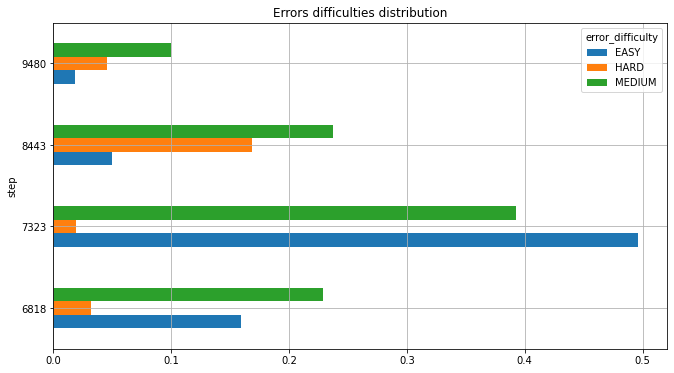

In [14]:
code_errors.groupby(by=["step"])["error_difficulty"].value_counts() \
           .unstack(0).div(err_counts, axis=1).transpose() \
           .plot.barh(figsize=(11, 6))
plt.grid()
plt.title("Errors difficulties distribution")
plt.show()

Выводы:
1. Наиболее сложные к исправлению ошибки ожидаемо чаще появляются в степе про условные конструкции, где нужно писать навороченные переборы случаев, которые во многих случаях не исправляются простым способом без изменения структуры программы
2. Как ни странно, в алгоритмической задаче почти нет решений со сложно исправляемыми ошибками